# Joint Undergraduate Researcher Onboarding #4
**Topic:** 1. Introduction to MongoDB 2. Read and save date to a local databse

**Date:** March 30, 2022

**Prepared by:** Qian Chen

# Outline
* Introduction to MongoDB
* Install MongoDB
* Connect and save data in the local database and look at the database in Robo 3T

# Further reading

- MongoDB Documentation

https://docs.mongodb.com/manual/?_ga=2.82372305.61423472.1647972132-534970261.1636954296
 

- MongoDB Primer from the Materials Project Workshop

https://workshop.materialsproject.org/primer/03_MongoDB_part1/lessons_filled/


- More resources on MongoDB

https://www.udacity.com/course/data-wrangling-with-mongodb--ud032

https://university.mongodb.com/?tck=docs_landing&_ga=2.41979746.61423472.1647972132-534970261.1636954296


- PyMongo Tutorial + Documentation (using python to write MongoDB databases)

https://pymongo.readthedocs.io/en/stable/tutorial.html

https://pymongo.readthedocs.io/en/stable/index.html

# Before the training

* Install Robo3T
   * https://robomongo.org/download
   * Select `Download Robo 3T` then fill the required fields with your email, name and `Install for Mac` 

* LBNL VPN
    * Follow the instructions at https://commons.lbl.gov/display/itfaq/Install+Cisco+VPN+client#VPNinstall--768892145

# 1. Introduction to MongoDB

### MongoDB Structure

In [1]:
from IPython.display import Image
Image(url= "https://studio3t.com/wp-content/uploads/2019/11/mongodb-data-hierarchy.png")

### Data Structure in MongoDB

object → {`field`: `value`, `field1`: `value1`, ...}


fields: `string`


values:  `string`, `int/double`, `true`, `false`, `null`, `array`, `object`, ...

*example:*

```
{
    name: Sue,
    age: 28,
    lawSpecialties: [copyright, tax],
    canMeet:
        { 
            mon: True,
            tues: False,
            wed: True,
            thurs: True,
            fri: False,
        }    
}
```

# 2. Install MongoDB

## Install homebrew if it's not installed on your computer

- Check if it's installed `which brew`

- Install homebrew
    - Go to https://brew.sh/ in your web browser
    - Copy and paste the command below Install Homebrew to your Terminal

## Install Mongodb

In Terminal:

`brew tap mongodb/brew`

`brew install mongodb-community`

To start mongodb service:

`brew services start mongodb-community`

To stop mongodb service:

`brew services stop mongodb-community `brew install mongodb-community

## Install maggma

https://github.com/materialsproject/maggma

In terminal (with the conda enviorment activated): 
`pip install maggma`

# 3. Connect to the local database

In [2]:
from pprint import pprint
from maggma.stores.mongolike import MongoStore

https://github.com/materialsproject/maggma/blob/790dde0b148bc3717e1176df9bd5ffebe87961ef/src/maggma/stores/mongolike.py#L109

In [3]:
my_collecion = MongoStore(database="my_database",collection_name='my_collection')

In [3]:
my_collecion.connect()

In [4]:
print(my_collecion.host)

localhost


In [5]:
# Remove all the documents in my_collection
# Don't use it unless you are sure about it
my_collecion.remove_docs({})

In [7]:
new_doc = {
    'meeting_name':'onboarding_meeting_3',
    'date': 'March 30',
    'sessions' :[4,5],
    'year': 2022,
    'people': {
        'mentees':['Alex','Aryan','Tasha'],
        'instructors':['Qian','Ann']
    }
}
pprint(new_doc)

{'date': 'March 30',
 'meeting_name': 'onboarding_meeting_3',
 'people': {'instructors': ['Qian', 'Ann'],
            'mentees': ['Alex', 'Aryan', 'Tasha']},
 'sessions': [4, 5],
 'year': 2022}


In [8]:
my_collecion.update(new_doc,key='meeting_name')

In [9]:
my_collecion.query_one({})

{'_id': ObjectId('62448d2b758c40ca2a87235f'),
 'meeting_name': 'onboarding_meeting_3',
 'date': 'March 30',
 'sessions': [4, 5],
 'year': 2022,
 'people': {'mentees': ['Alex', 'Aryan', 'Tasha'],
  'instructors': ['Qian', 'Ann']}}

In [10]:
new_doc = {
    'meeting_name':'onboarding_meeting_2',
    'date': 'March 28',
    'sessions' :[2,3],
    'year': 2022,
    'people': {
        'mentees':['Alex','Aryan','Tasha'],
        'instructors':['Jiyoon','Ann']
    }
}
pprint(new_doc)

{'date': 'March 28',
 'meeting_name': 'onboarding_meeting_2',
 'people': {'instructors': ['Jiyoon', 'Ann'],
            'mentees': ['Alex', 'Aryan', 'Tasha']},
 'sessions': [2, 3],
 'year': 2022}


In [11]:
my_collecion.update(new_doc,key='meeting_name')

## Query operators

https://www.mongodb.com/docs/manual/reference/operator/query/

In [12]:
doc_list = list(my_collecion.query({'year':2022}))
pprint(doc_list)

[{'_id': ObjectId('62448d2b758c40ca2a87235f'),
  'date': 'March 30',
  'meeting_name': 'onboarding_meeting_3',
  'people': {'instructors': ['Qian', 'Ann'],
             'mentees': ['Alex', 'Aryan', 'Tasha']},
  'sessions': [4, 5],
  'year': 2022},
 {'_id': ObjectId('62448dbc758c40ca2a8723d2'),
  'date': 'March 28',
  'meeting_name': 'onboarding_meeting_2',
  'people': {'instructors': ['Jiyoon', 'Ann'],
             'mentees': ['Alex', 'Aryan', 'Tasha']},
  'sessions': [2, 3],
  'year': 2022}]


In [13]:
# $in
doc_list =list(my_collecion.query({'sessions':{'$in':[1,2,3,4,5]}}))
pprint(doc_list)

[{'_id': ObjectId('62448d2b758c40ca2a87235f'),
  'date': 'March 30',
  'meeting_name': 'onboarding_meeting_3',
  'people': {'instructors': ['Qian', 'Ann'],
             'mentees': ['Alex', 'Aryan', 'Tasha']},
  'sessions': [4, 5],
  'year': 2022},
 {'_id': ObjectId('62448dbc758c40ca2a8723d2'),
  'date': 'March 28',
  'meeting_name': 'onboarding_meeting_2',
  'people': {'instructors': ['Jiyoon', 'Ann'],
             'mentees': ['Alex', 'Aryan', 'Tasha']},
  'sessions': [2, 3],
  'year': 2022}]


In [14]:
# $all
my_collecion.count({'sessions':{'$all':[1,2,3,4,5]}})

0

In [15]:
# $all
my_collecion.count({'sessions':{'$all':[2,3]}})

1

In [16]:
# $nin
my_collecion.count({'sessions':{'$nin':[1,2,3]}})

1

In [18]:
# $gt or $le
my_collecion.count({'year':{'$gt':2000}})

2

In [19]:
my_collecion.count({'people.instructors':{'$in':['Qian']}})

1

In [21]:
my_collecion.count({'meeting_name':{'$regex':'onboarding*'}})

2

In [ ]:
# $and
my_collection.count({'$and':[{'year':2022},{'people.instructors':{'$in':['Qian']}},{'date':{'$regex':'March'}}]})

## Using get in pydash to look at the nested dictionary

In [22]:
from pydash import get

In [27]:
for doc in doc_list:
    # print(get(doc,'year'))
    print(get(doc,'people.instructors[0]'))

Qian
Jiyoon


## Look at the local database in Robo 3T

# 4. Excercise

## Save a new document to the collection

Get the structures for  `mp-25275`, `mp-22584`, `mp-677217`, `mp-1045420`, `mp-1443666` from materials project and store the below information as a document in a new collection named `my_structures` using `mp_id` as the key:
- mp_id
- composition of the structure
- a list of elements in the structure
- all the information contained in the structure object (lattice, sites,  etc.)
- today's date

An example for mp-22526 is as below:

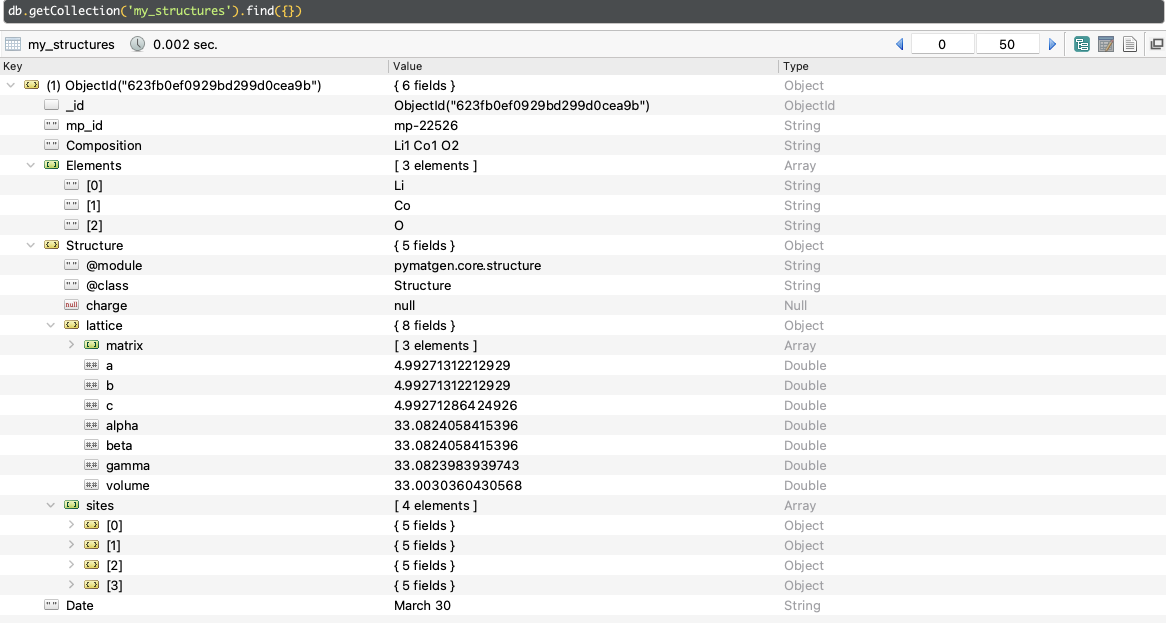

In [28]:
from pymatgen.ext.matproj import MPRester
mpr = MPRester()
mp_ids = ["mp-25275", "mp-22584", "mp-677217", "mp-1045420", "mp-1443666"]

In [29]:
structure_collection = MongoStore(database='my_database',collection_name='my_structures')
structure_collection.connect()
structure_collection.remove_docs({})
for mp_id in mp_ids:
    struct = mpr.get_structure_by_material_id(mp_id)
    doc = {
        'mp_id': mp_id,
        'Composition': struct.composition,
        'Elements': [specie.name for specie in struct.composition.elements],
        'Structure': struct.as_dict(),
        'Date': 'March 30'
    }
    structure_collection.update(doc,key='mp_id')

/Users/QianChen/opt/miniconda3/envs/cms/lib/python3.9/site-packages/pymatgen/ext/matproj.py:685: UserWarning: The calculation task mp-1045420 is mapped to canonical mp-id mvc-16768, so structure for mvc-16768 returned. This is not an error, see documentation. If original task data for mp-1045420 is required, use get_task_data(). To find the canonical mp-id from a task id use get_materials_id_from_task_id().
  warnings.warn(
/Users/QianChen/opt/miniconda3/envs/cms/lib/python3.9/site-packages/pymatgen/ext/matproj.py:685: UserWarning: The calculation task mp-1443666 is mapped to canonical mp-id mvc-27, so structure for mvc-27 returned. This is not an error, see documentation. If original task data for mp-1443666 is required, use get_task_data(). To find the canonical mp-id from a task id use get_materials_id_from_task_id().
  warnings.warn(


## Using query to find the documents

- Find the document for `mp-25275`

In [30]:
list(structure_collection.query({'mp_id':'mp-25275'}))

[{'_id': ObjectId('62449ab2758c40ca2a872eb9'),
  'mp_id': 'mp-25275',
  'Composition': 'Mn4 O8',
  'Elements': ['Mn', 'O'],
  'Structure': {'@module': 'pymatgen.core.structure',
   '@class': 'Structure',
   'charge': None,
   'lattice': {'matrix': [[5.046884, 0.00033, 2.914472],
     [1.670227, 4.753967, 2.916367],
     [0.008062, -0.01135, 5.830838]],
    'a': 5.827965790663154,
    'b': 5.82194614775051,
    'c': 5.8308546200868365,
    'alpha': 60.01771288652118,
    'beta': 59.91529779884742,
    'gamma': 60.066996166749185,
    'volume': 139.8945617779943},
   'sites': [{'species': [{'element': 'Mn', 'occu': 1}],
     'abc': [0.500001, 0.5, 0.499999],
     'xyz': [3.362591538822, 2.37147351168, 5.830835583634],
     'label': 'Mn',
     'properties': {'magmom': 3.25}},
    {'species': [{'element': 'Mn', 'occu': 1}],
     'abc': [0.0, 0.500001, 0.499999],
     'xyz': [0.839146162165, 2.371313265317, 4.373599585529],
     'label': 'Mn',
     'properties': {'magmom': 3.25}},
    {'spe

- Find the mp-ids for structures that 
    1. contain 'O' 
    1. don't contain 'Li' or 'Mg' 
    1. contain both 'Mn' and 'O' in the elements

In [31]:
doc_list = list(structure_collection.query({'Elements':{'$in':['O']}}))
print([doc['mp_id'] for doc in doc_list])

['mp-25275', 'mp-22584']


In [32]:
doc_list = list(structure_collection.query({'Elements':{'$nin':['Li','Mg']}}))
print([doc['mp_id'] for doc in doc_list])

['mp-25275']


In [33]:
doc_list = list(structure_collection.query({'Elements':{'$all':['Mn','O']}}))
print([doc['mp_id'] for doc in doc_list])

['mp-25275', 'mp-22584']


- Find the structure(s) that 
    - starts with 'Li'  in the composition 
    - and have a lattice parameter a larger than 5 
    
And export them to cif file(s) using the mp_id as the file name

In [34]:
from pymatgen.core import Structure
doc_list = list(structure_collection.query({'$and':[{'Composition':{'$regex':'Li*'}},{'Structure.lattice.a':{'$gt':5}}]}))
for doc in doc_list:
    structure = Structure.from_dict(doc['Structure'])
    structure.to(filename=doc['mp_id']+'.cif')